In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import censusdata
import geopandas as gpd
%matplotlib inline

Places in Massachusetts

In [ ]:
places_in_massachusetts = censusdata.geographies(censusdata.censusgeo([('state','25'), ('place', '*')]), 'acs5', 2019)
print (places_in_massachusetts)

{'Weymouth Town city, Massachusetts': censusgeo((('state', '25'), ('place', '78972'))), 'Winthrop Town city, Massachusetts': censusgeo((('state', '25'), ('place', '81005'))), 'Belchertown CDP, Massachusetts': censusgeo((('state', '25'), ('place', '04790'))), 'Needham CDP, Massachusetts': censusgeo((('state', '25'), ('place', '44140'))), 'Quincy city, Massachusetts': censusgeo((('state', '25'), ('place', '55745'))), 'Abington CDP, Massachusetts': censusgeo((('state', '25'), ('place', '00135'))), 'Kingston CDP, Massachusetts': censusgeo((('state', '25'), ('place', '33185'))), 'Mattapoisett Center CDP, Massachusetts': censusgeo((('state', '25'), ('place', '39485'))), 'South Duxbury CDP, Massachusetts': censusgeo((('state', '25'), ('place', '63690'))), 'Wareham Center CDP, Massachusetts': censusgeo((('state', '25'), ('place', '73020'))), 'Cambridge city, Massachusetts': censusgeo((('state', '25'), ('place', '11000'))), 'Pinehurst CDP, Massachusetts': censusgeo((('state', '25'), ('place', '

In [ ]:
censusdata.search('acs5', 2015,'concept', 'language spoken')


[('B06007PR_001E',
  'PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN PUERTO RICO',
  'Estimate!!Total'),
 ('B06007PR_002E',
  'PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN PUERTO RICO',
  'Estimate!!Total!!Speak only English'),
 ('B06007PR_003E',
  'PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN PUERTO RICO',
  'Estimate!!Total!!Speak Spanish'),
 ('B06007PR_004E',
  'PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN PUERTO RICO',
  'Estimate!!Total!!Speak Spanish!!Speak English "very well"'),
 ('B06007PR_005E',
  'PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN PUERTO RICO',
  'Estimate!!Total!!Speak Spanish!!Speak English less than "very well"'),
 ('B06007PR_006E',
  'PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN PUERTO RICO',
  'Estimate!!Total!!Speak other languages'),
 ('B06007PR_007E',
  'PLACE OF BIRTH BY LANGUAGE SPOKEN 

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'S1601'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
S1601_C01_001E | LANGUAGE SPOKEN AT HOME        | !! !! Estimate Total Population 5 years and over         | int  
S1601_C01_002E | LANGUAGE SPOKEN AT HOME        | !! !! !! Estimate Total Population 5 years and over Spea | int  
S1601_C01_003E | LANGUAGE SPOKEN AT HOME        | !! !! !! Estimate Total Population 5 years and over Spea | int  
S1601_C01_004E | LANGUAGE SPOKEN AT HOME        | !! !! !! !! Estimate Total Population 5 years and over S | int  
S1601_C01_005E | LANGUAGE SPOKEN AT HOME        | !! !! !! !! !! Estimate Total Population 5 years and ove | int  
S1601_C01_006E | LANGUAGE SPOKEN AT HOME        | !! !! !! !! !! Estimate Total Population 5 years and ove | int  
S1601_C01_007E | LANGUAGE SPOKEN AT HOME        | !! !! !! !! !! Estimate Total P

In [ ]:
massachusetts_english_non_english_speaking_by_place = censusdata.download('acs5', 2019, censusdata.censusgeo([('state', '25'), ('place', '*')]),['S1601_C01_002E', 'S1601_C01_003E'],
                                   tabletype='subject')

In [ ]:
massachusetts_english_non_english_speaking_by_place = massachusetts_english_non_english_speaking_by_place.rename(columns={'S1601_C01_002E': 'household_english_speaking', 'S1601_C01_003E': 'household_non_english_speaking'})

In [ ]:
print(massachusetts_english_non_english_speaking_by_place)

                                                    household_english_speaking  \
Weymouth Town city, Massachusetts: Summary leve...                       45553   
Winthrop Town city, Massachusetts: Summary leve...                       13635   
Belchertown CDP, Massachusetts: Summary level: ...                        2415   
Needham CDP, Massachusetts: Summary level: 160,...                       24402   
Quincy city, Massachusetts: Summary level: 160,...                       54878   
...                                                                        ...   
Upton CDP, Massachusetts: Summary level: 160, s...                        2170   
Watertown Town city, Massachusetts: Summary lev...                       23381   
West Springfield Town city, Massachusetts: Summ...                       21127   
Edgartown CDP, Massachusetts: Summary level: 16...                         484   
Hanscom AFB CDP, Massachusetts: Summary level: ...                        1584   

               

In [ ]:
censusdata.exportcsv('massachusetts_english_non_english_speaking_by_place.csv', massachusetts_english_non_english_speaking_by_place)

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'S1903'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
S1903_C01_001E | MEDIAN INCOME IN THE PAST 12 M | !! !! !! Estimate Number HOUSEHOLD INCOME BY RACE AND HI | int  
S1903_C01_002E | MEDIAN INCOME IN THE PAST 12 M | !! !! !! !! !! Estimate Number HOUSEHOLD INCOME BY RACE  | int  
S1903_C01_003E | MEDIAN INCOME IN THE PAST 12 M | !! !! !! !! !! Estimate Number HOUSEHOLD INCOME BY RACE  | int  
S1903_C01_004E | MEDIAN INCOME IN THE PAST 12 M | !! !! !! !! !! Estimate Number HOUSEHOLD INCOME BY RACE  | int  
S1903_C01_005E | MEDIAN INCOME IN THE PAST 12 M | !! !! !! !! !! Estimate Number HOUSEHOLD INCOME BY RACE  | int  
S1903_C01_006E | MEDIAN INCOME IN THE PAST 12 M | !! !! !! !! !! Estimate Number HOUSEHOLD INCOME BY RACE  | int  
S1903_C01_007E | MEDIAN INCOME IN THE PAST 12 M | !! !! !! !! !! Estimate Number 

In [ ]:
massachusetts_median_income_by_place = censusdata.download('acs5', 2019, censusdata.censusgeo([('state', '25'), ('place', '*')]),['S1903_C03_001E'],
                                   tabletype='subject')
massachusetts_median_income_by_place = massachusetts_median_income_by_place.rename(columns={'S1903_C03_001E': 'median_income'})
censusdata.exportcsv('massachusetts_median_income_by_place.csv', massachusetts_median_income_by_place )

In [ ]:
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = "getCityLocation")
geocoder.geocode("Weymouth Town,  Massachusetts")

Location(Weymouth, Norfolk County, Massachusetts, 02189, United States, (42.2212188, -70.9391625, 0.0))

<AxesSubplot:>

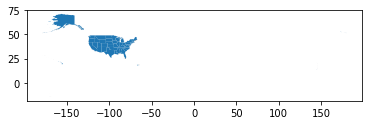

In [ ]:
us_states_cartographic_boundary = gpd.read_file('./cb_2019_us_state_500k/cb_2019_us_state_500k.shp')
us_states_cartographic_boundary.plot()

<AxesSubplot:>

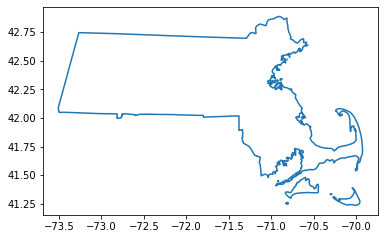

In [ ]:
massachusetts_state = us_states_cartographic_boundary[us_states_cartographic_boundary['NAME'] == 'Massachusetts']
massachusetts_state.boundary.plot()

<AxesSubplot:>

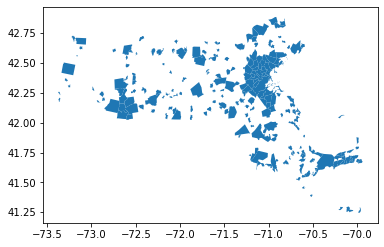

In [ ]:
massachusetts_cbps_boundaries = gpd.read_file('./cb_2019_25_place_500k/cb_2019_25_place_500k.shp')
massachusetts_cbps_boundaries.plot()

<AxesSubplot:>

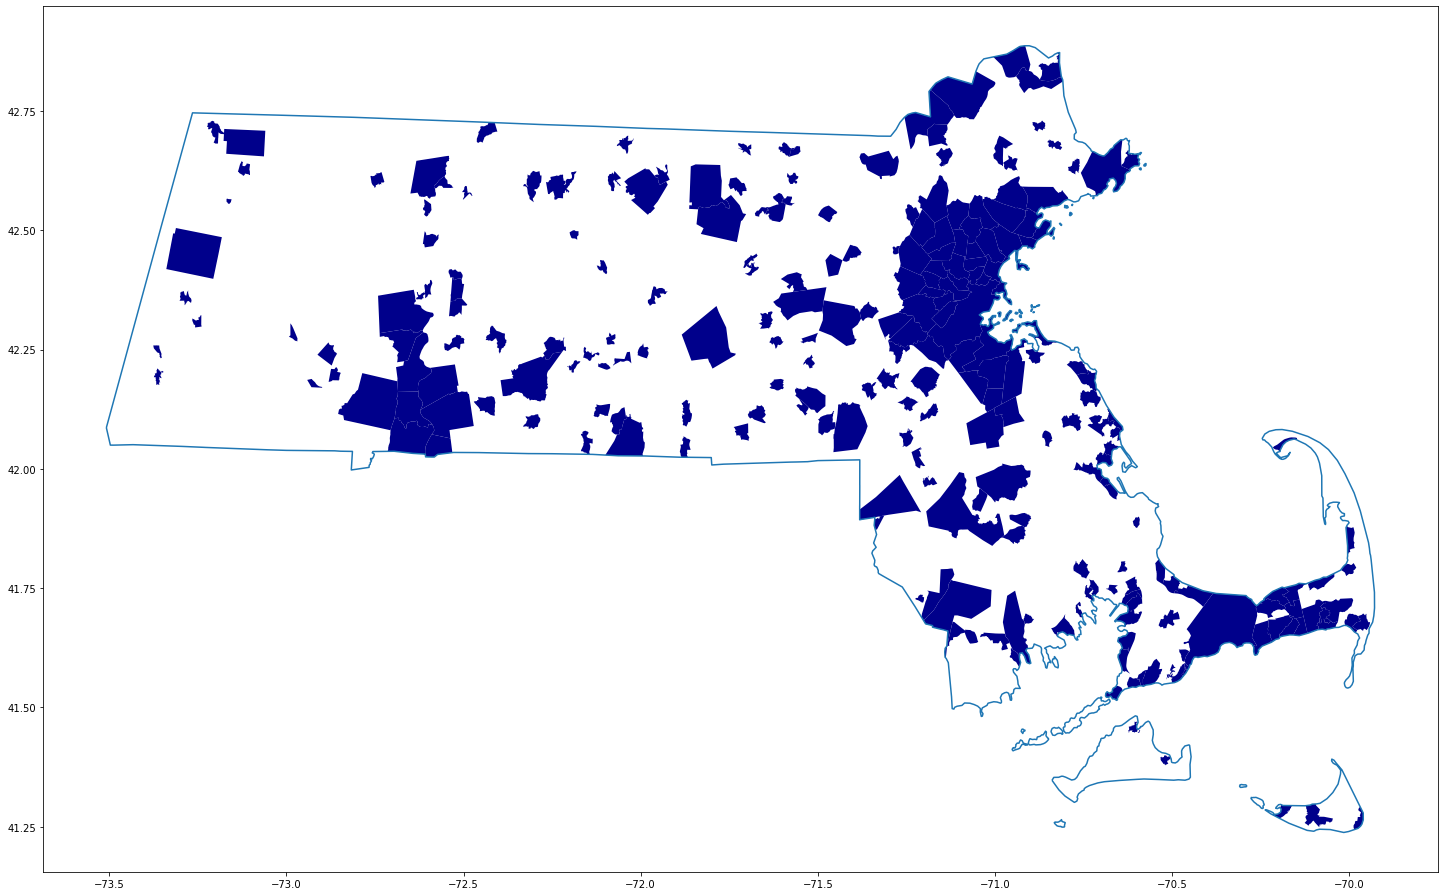

In [ ]:
massachusetts_state_boundary = massachusetts_state.boundary.plot(figsize=(25, 25))
massachusetts_cbps_boundaries.plot(ax=massachusetts_state_boundary, color="DarkBlue")

In [ ]:
massachusetts_median_income_by_place = pd.read_csv("massachusetts_median_income_by_place.csv")
massachusetts_median_income_by_place.to_csv("test.csv")

In [ ]:
massachusetts_english_non_english_speaking_by_place = pd.read_csv("massachusetts_english_non_english_speaking_by_place.csv")


     state  place                                NAME  \
0       25    135         Abington CDP, Massachusetts   
1       25    530  Acushnet Center CDP, Massachusetts   
2       25    590            Adams CDP, Massachusetts   
3       25    840     Agawam Town city, Massachusetts   
4       25   1260   Amesbury Town city, Massachusetts   
..     ...    ...                                 ...   
240     25  81005   Winthrop Town city, Massachusetts   
241     25  81035          Woburn city, Massachusetts   
242     25  81245       Woods Hole CDP, Massachusetts   
243     25  82000       Worcester city, Massachusetts   
244     25  82595    Yarmouth Port CDP, Massachusetts   

     household_english_speaking  household_non_english_speaking  \
0                         13971                            1637   
1                          2706                             319   
2                          4924                             208   
3                         23501                

In [ ]:
massachusetts_cbps_boundaries.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,25,19370,00618199,1600000US2519370,2519370,Easthampton Town,25,34502319,726843,"POLYGON ((-72.73673 42.28424, -72.68577 42.290..."
1,25,40115,00619406,1600000US2540115,2540115,Melrose,25,12129527,219702,"POLYGON ((-71.08212 42.44394, -71.08060 42.453..."
2,25,55535,02378207,1600000US2555535,2555535,Provincetown,57,4629286,8929481,"POLYGON ((-70.21459 42.04536, -70.21131 42.047..."
3,25,56095,02378209,1600000US2556095,2556095,Raynham Center,57,10919100,326702,"POLYGON ((-71.06364 41.92409, -71.06223 41.928..."
4,25,28425,02727442,1600000US2528425,2528425,Hanscom AFB,57,2307230,0,"POLYGON ((-71.28937 42.46370, -71.28747 42.464..."


In [ ]:
massachusetts_cbps_boundaries.sort_values(by=['NAME'], inplace=True)
massachusetts_cbps_boundaries.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
26,25,00135,02377975,1600000US2500135,2500135,Abington,57,25796030,594787,"POLYGON ((-71.00215 42.12730, -70.98127 42.135..."
18,25,00530,02377976,1600000US2500530,2500530,Acushnet Center,57,3665198,75869,"POLYGON ((-70.91900 41.68543, -70.91671 41.688..."
135,25,00590,02377977,1600000US2500590,2500590,Adams,57,5859625,66047,"POLYGON ((-73.13679 42.62240, -73.13402 42.629..."
49,25,00840,00618180,1600000US2500840,2500840,Agawam Town,25,60400819,2611581,"POLYGON ((-72.71312 42.03891, -72.71246 42.041..."
122,25,01260,00618292,1600000US2501260,2501260,Amesbury Town,25,31836417,3729019,"POLYGON ((-70.99744 42.86425, -70.99724 42.864..."


In [ ]:
massachusetts_english_non_english_by_place.head()

,state,place,NAME,household_english_speaking,household_non_english_speaking,percent_non_english_speaking_households
0,25,135,"Abington CDP, Massachusetts",13971,1637,0.10
1,25,530,"Acushnet Center CDP, Massachusetts",2706,319,0.11
2,25,590,"Adams CDP, Massachusetts",4924,208,0.04
3,25,840,"Agawam Town city, Massachusetts",23501,3711,0.14
4,25,1260,"Amesbury Town city, Massachusetts",15934,741,0.04


In [ ]:
massachusetts_cbps_boundaries.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
26,25,00135,02377975,1600000US2500135,2500135,Abington,57,25796030,594787,"POLYGON ((-71.00215 42.12730, -70.98127 42.135..."
18,25,00530,02377976,1600000US2500530,2500530,Acushnet Center,57,3665198,75869,"POLYGON ((-70.91900 41.68543, -70.91671 41.688..."
135,25,00590,02377977,1600000US2500590,2500590,Adams,57,5859625,66047,"POLYGON ((-73.13679 42.62240, -73.13402 42.629..."
49,25,00840,00618180,1600000US2500840,2500840,Agawam Town,25,60400819,2611581,"POLYGON ((-72.71312 42.03891, -72.71246 42.041..."
122,25,01260,00618292,1600000US2501260,2501260,Amesbury Town,25,31836417,3729019,"POLYGON ((-70.99744 42.86425, -70.99724 42.864..."


In [ ]:
massachusetts_median_income_by_place.head

<bound method NDFrame.head of      state  place                                NAME  median_income
0       25    135         Abington CDP, Massachusetts          99381
1       25    530  Acushnet Center CDP, Massachusetts          81375
2       25    590            Adams CDP, Massachusetts          48252
3       25    840     Agawam Town city, Massachusetts          68944
4       25   1260   Amesbury Town city, Massachusetts          82468
..     ...    ...                                 ...            ...
240     25  81005   Winthrop Town city, Massachusetts          74069
241     25  81035          Woburn city, Massachusetts          91022
242     25  81245       Woods Hole CDP, Massachusetts          97569
243     25  82000       Worcester city, Massachusetts          48139
244     25  82595    Yarmouth Port CDP, Massachusetts          74737

[245 rows x 4 columns]>

In [ ]:
massachusetts_median_income_by_place['median_income']

0      99381
1      81375
2      48252
3      68944
4      82468
       ...  
240    74069
241    91022
242    97569
243    48139
244    74737
Name: median_income, Length: 245, dtype: int64

In [ ]:
massachusetts_cbps_boundaries.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
26,25,00135,02377975,1600000US2500135,2500135,Abington,57,25796030,594787,"POLYGON ((-71.00215 42.12730, -70.98127 42.135..."
18,25,00530,02377976,1600000US2500530,2500530,Acushnet Center,57,3665198,75869,"POLYGON ((-70.91900 41.68543, -70.91671 41.688..."
135,25,00590,02377977,1600000US2500590,2500590,Adams,57,5859625,66047,"POLYGON ((-73.13679 42.62240, -73.13402 42.629..."
49,25,00840,00618180,1600000US2500840,2500840,Agawam Town,25,60400819,2611581,"POLYGON ((-72.71312 42.03891, -72.71246 42.041..."
122,25,01260,00618292,1600000US2501260,2501260,Amesbury Town,25,31836417,3729019,"POLYGON ((-70.99744 42.86425, -70.99724 42.864..."


In [ ]:
massachusetts_cbps_boundaries_with_median_income = gpd.read_file('./cb_2019_25_place_500k/cb_2019_25_place_500k.shp')
massachusetts_cbps_boundaries_with_median_income.sort_values(by=['NAME'], inplace=True)
massachusetts_cbps_boundaries_with_median_income.reset_index(drop=True, inplace=True)
massachusetts_cbps_boundaries_with_median_income.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,25,00135,02377975,1600000US2500135,2500135,Abington,57,25796030,594787,"POLYGON ((-71.00215 42.12730, -70.98127 42.135..."
1,25,00530,02377976,1600000US2500530,2500530,Acushnet Center,57,3665198,75869,"POLYGON ((-70.91900 41.68543, -70.91671 41.688..."
2,25,00590,02377977,1600000US2500590,2500590,Adams,57,5859625,66047,"POLYGON ((-73.13679 42.62240, -73.13402 42.629..."
3,25,00840,00618180,1600000US2500840,2500840,Agawam Town,25,60400819,2611581,"POLYGON ((-72.71312 42.03891, -72.71246 42.041..."
4,25,01260,00618292,1600000US2501260,2501260,Amesbury Town,25,31836417,3729019,"POLYGON ((-70.99744 42.86425, -70.99724 42.864..."


In [ ]:
massachusetts_cbps_boundaries_with_median_income['median_income'] = massachusetts_median_income_by_place['median_income']
massachusetts_cbps_boundaries_with_median_income.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,median_income
0,25,00135,02377975,1600000US2500135,2500135,Abington,57,25796030,594787,"POLYGON ((-71.00215 42.12730, -70.98127 42.135...",99381
1,25,00530,02377976,1600000US2500530,2500530,Acushnet Center,57,3665198,75869,"POLYGON ((-70.91900 41.68543, -70.91671 41.688...",81375
2,25,00590,02377977,1600000US2500590,2500590,Adams,57,5859625,66047,"POLYGON ((-73.13679 42.62240, -73.13402 42.629...",48252
3,25,00840,00618180,1600000US2500840,2500840,Agawam Town,25,60400819,2611581,"POLYGON ((-72.71312 42.03891, -72.71246 42.041...",68944
4,25,01260,00618292,1600000US2501260,2501260,Amesbury Town,25,31836417,3729019,"POLYGON ((-70.99744 42.86425, -70.99724 42.864...",82468


In [ ]:
massachusetts_cbps_boundaries_with_median_income.drop(massachusetts_cbps_boundaries_with_median_income.index[massachusetts_cbps_boundaries_with_median_income['median_income'] == -666666666
], inplace=True)

<AxesSubplot:>

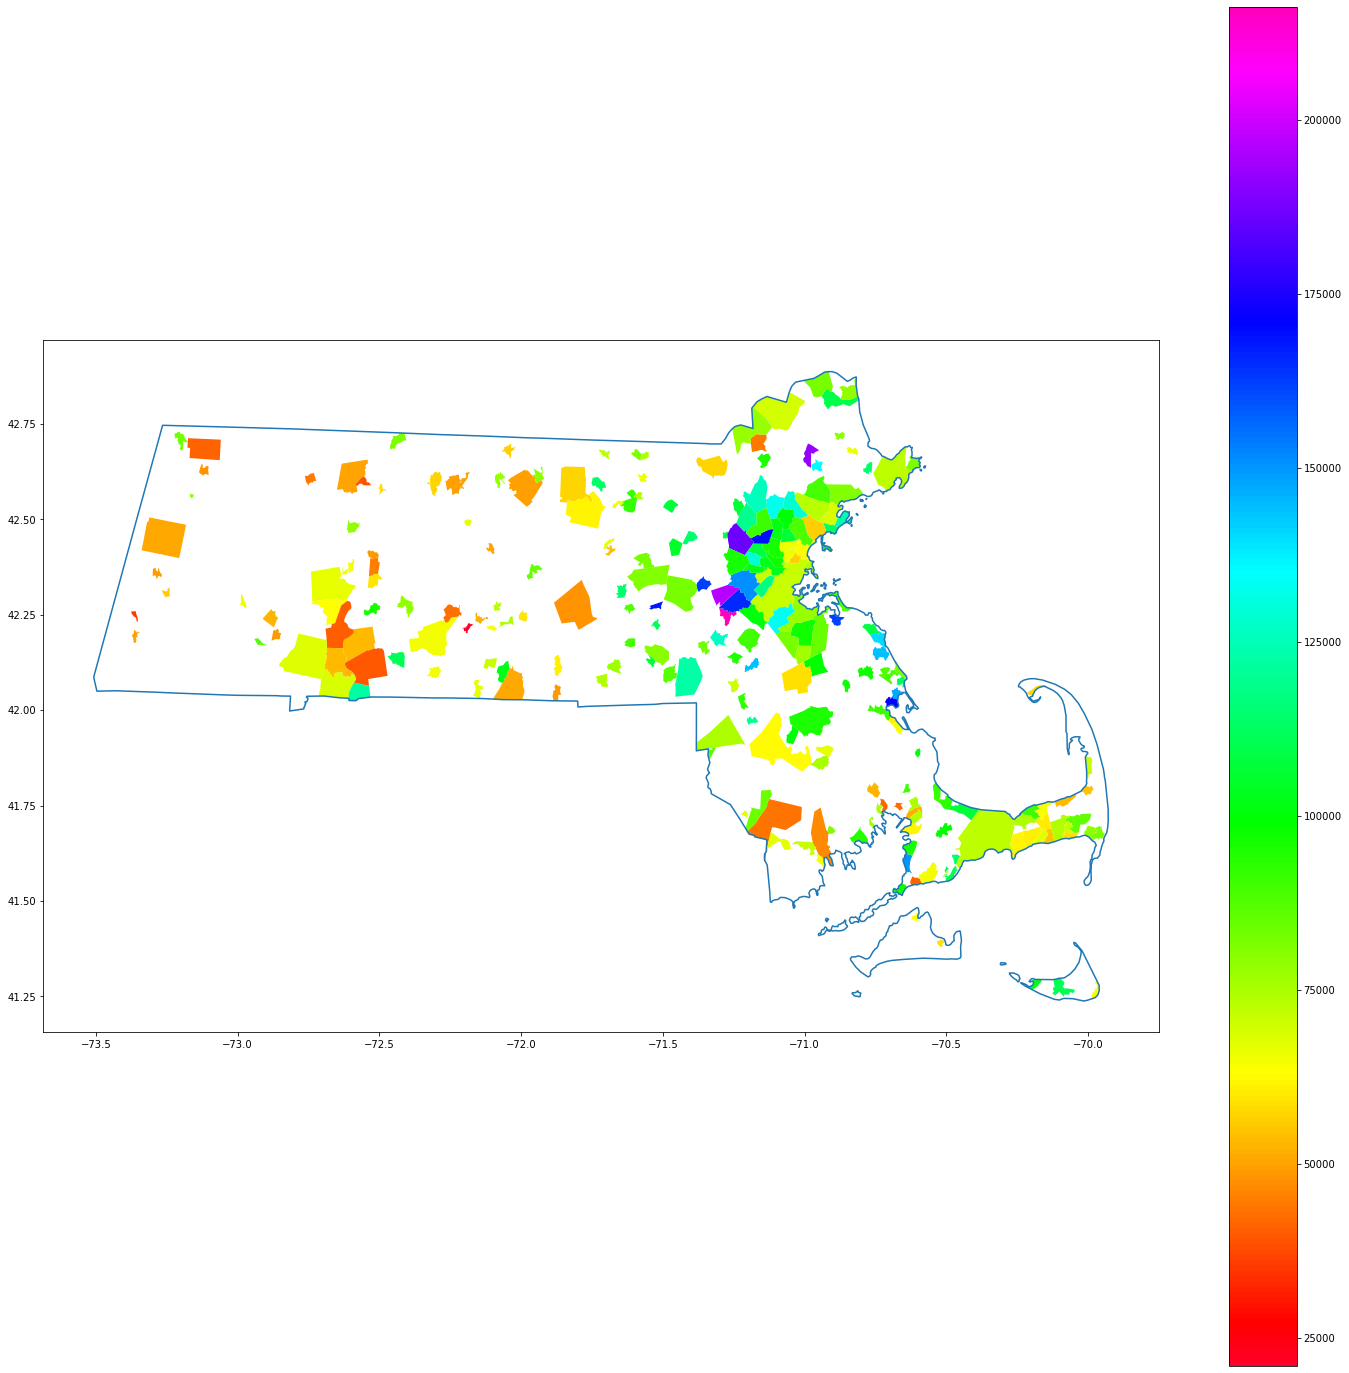

In [ ]:
massachusetts_state_boundary = massachusetts_state.boundary.plot(figsize=(25, 25))
massachusetts_cbps_boundaries_with_median_income.plot(column='median_income', ax=massachusetts_state_boundary, cmap='gist_rainbow', legend=True)

In [ ]:
massachusetts_cbps_boundaries_with_percent_non_english_speaking_households = gpd.read_file('./cb_2019_25_place_500k/cb_2019_25_place_500k.shp')
massachusetts_cbps_boundaries_with_percent_non_english_speaking_households.sort_values(by=['NAME'], inplace=True)
massachusetts_cbps_boundaries_with_percent_non_english_speaking_households.reset_index(drop=True, inplace=True)


In [ ]:
massachusetts_cbps_boundaries_with_percent_non_english_speaking_households['percent_non_english_speaking_households'] = massachusetts_english_non_english_speaking_by_place['percent_non_english_speaking_households']
massachusetts_cbps_boundaries_with_percent_non_english_speaking_households.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,percent_non_english_speaking_households
0,25,00135,02377975,1600000US2500135,2500135,Abington,57,25796030,594787,"POLYGON ((-71.00215 42.12730, -70.98127 42.135...",0.10
1,25,00530,02377976,1600000US2500530,2500530,Acushnet Center,57,3665198,75869,"POLYGON ((-70.91900 41.68543, -70.91671 41.688...",0.11
2,25,00590,02377977,1600000US2500590,2500590,Adams,57,5859625,66047,"POLYGON ((-73.13679 42.62240, -73.13402 42.629...",0.04
3,25,00840,00618180,1600000US2500840,2500840,Agawam Town,25,60400819,2611581,"POLYGON ((-72.71312 42.03891, -72.71246 42.041...",0.14
4,25,01260,00618292,1600000US2501260,2501260,Amesbury Town,25,31836417,3729019,"POLYGON ((-70.99744 42.86425, -70.99724 42.864...",0.04


<AxesSubplot:>

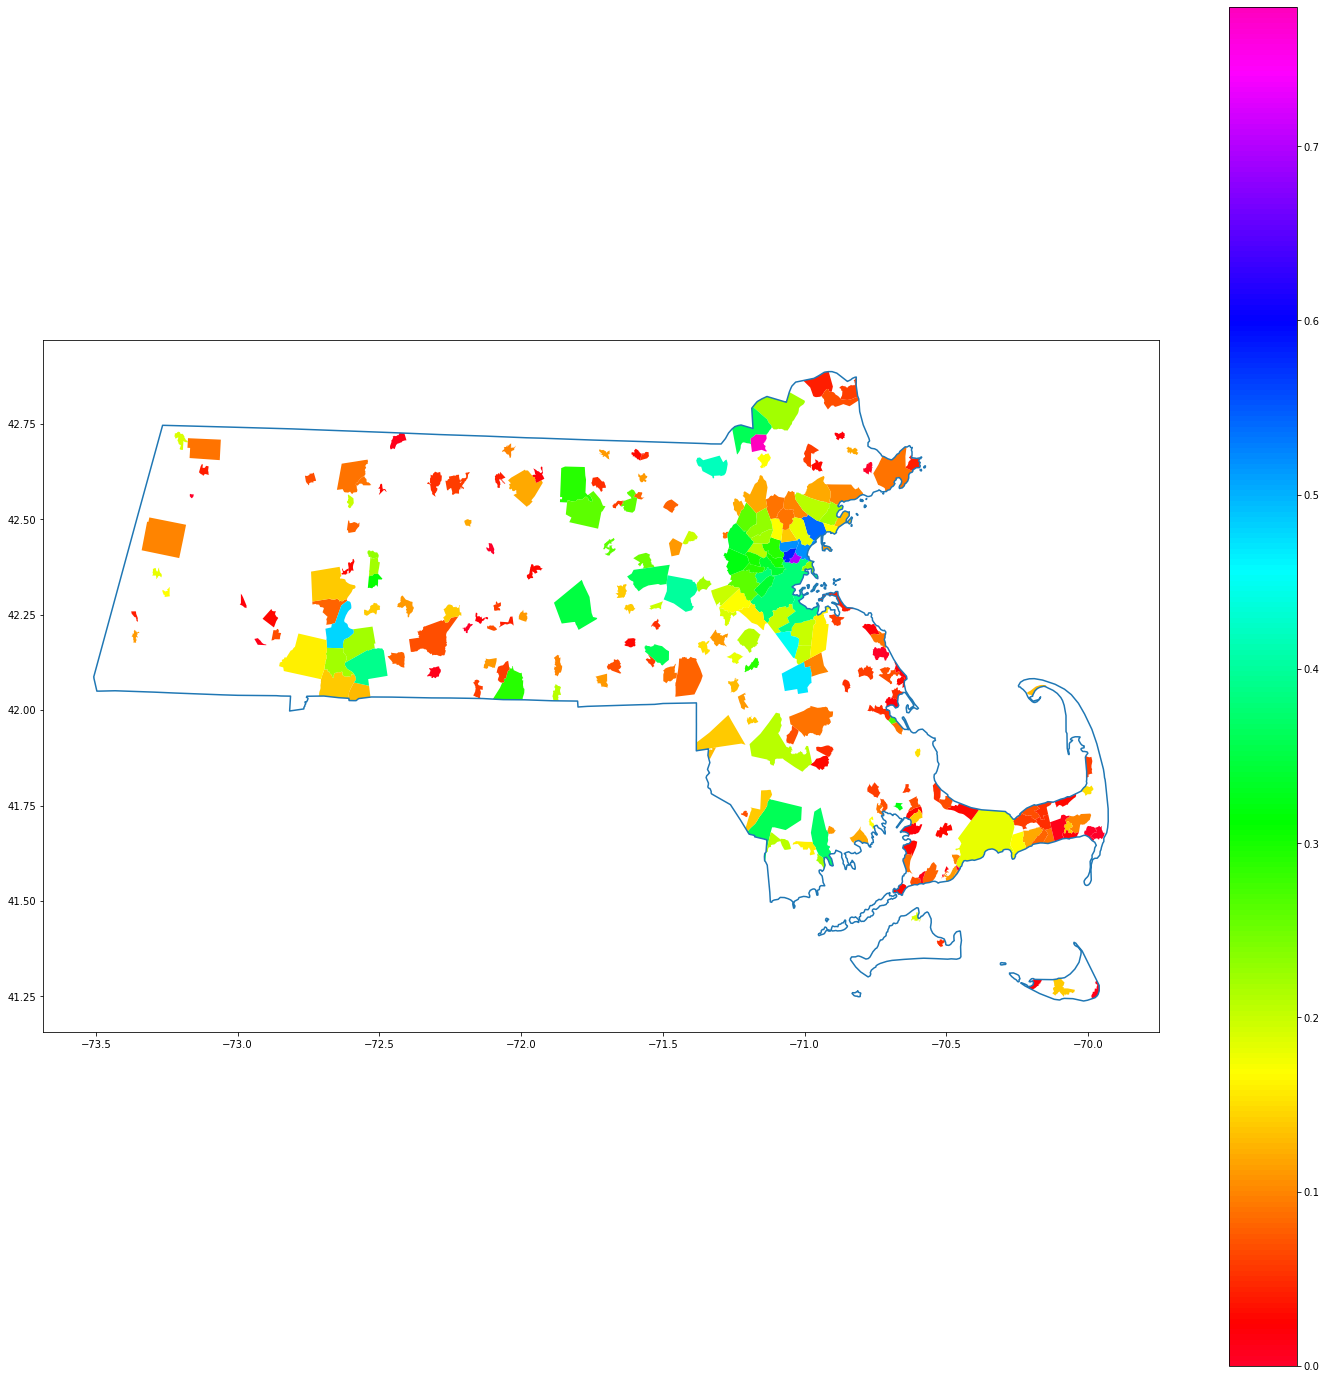

In [ ]:
massachusetts_state_boundary = massachusetts_state.boundary.plot(figsize=(25, 25))
massachusetts_cbps_boundaries_with_percent_non_english_speaking_households.plot(column='percent_non_english_speaking_households', cmap='gist_rainbow', ax=massachusetts_state_boundary, legend=True)

In [ ]:

massachusetts_cbps_boundaries_with_median_income.explore(column='median_income',  tooltip=['NAME', 'median_income'],cmap='gist_rainbow', legend=True)

In [ ]:
massachusetts_cbps_boundaries_with_percent_non_english_speaking_households.explore(column='percent_non_english_speaking_households', tooltip=['NAME', 'percent_non_english_speaking_households'],cmap='gist_rainbow',  legend=True)
